In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
filepath = "data/creditDefault.csv"
data = pd.read_csv(filepath)
data.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,isDefault
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,True
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,False
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,False
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,False
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,False
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151,False
6,20.996,3388,259,2,37,12,Female,No,No,African American,203,False
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872,False
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279,True
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350,False


In [3]:
data.shape

(400, 12)

### Temos um dataset com 400 linhas e 12 features.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
 11  isDefault  400 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 34.9+ KB


Todas as linhas estão preenchidas e não possuem valores nulos. Então não há necessidade de tratar valores faltantes.
Apenas a renda é do tipo float, os demais são inteiros, com exceção de gender, student, married, ethnicity e isDefault

In [5]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Temos entradas com credit balance = 0.

In [6]:
data.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


# Data Exploration



Mulheres: 207
Homens: 193

Não-Estudantes: 360
Estudantes: apenas 40

Casados: 245 vs Não casados: 155

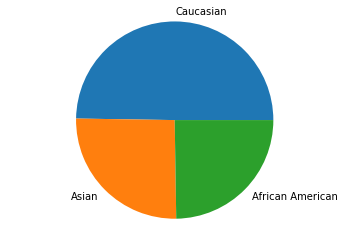

In [7]:
fig1, ax1 = plt.subplots()
ax1.pie(data['Ethnicity'].value_counts(), labels = ['Caucasian','Asian','African American'])
ax1.axis('equal')
plt.show()

In [8]:
data[['Ethnicity','Gender','Student']].value_counts()

Ethnicity         Gender  Student
Caucasian         Female  No         92
                   Male   No         90
Asian             Female  No         46
African American  Female  No         45
                   Male   No         44
Asian              Male   No         43
Caucasian         Female  Yes        10
Asian             Female  Yes         9
Caucasian          Male   Yes         7
African American   Male   Yes         5
                  Female  Yes         5
Asian              Male   Yes         4
dtype: int64

Quase 1/4 da base de dados é composta por mulheres caucasianas que não são estudantes.

In [9]:
data['Cards'].value_counts().head

<bound method NDFrame.head of 2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: Cards, dtype: int64>

In [10]:
data['Education'].value_counts()

16    50
15    49
14    48
13    38
12    37
17    34
11    33
9     25
10    24
18    22
8     14
19    10
7      8
6      5
20     2
5      1
Name: Education, dtype: int64

In [11]:
data['Balance'].value_counts()

0       90
133      3
1048     3
531      3
333      2
        ..
669      1
68       1
642      1
805      1
966      1
Name: Balance, Length: 284, dtype: int64

In [12]:
data['isDefault'].value_counts()

False    291
True     109
Name: isDefault, dtype: int64

### Vamos dividir o dataset entre variáveis categóricas e não-categóricas

In [13]:
dataCategorical = data[['Gender', 'Student', 'Married', 'Ethnicity', "isDefault"]]
dataNonCategorical = data[["Income", "Limit" ,"Rating", "Cards" , "Age" , "Education", "Balance"]]


In [14]:
dataCategorical

,Gender,Student,Married,Ethnicity,isDefault
0,Male,No,Yes,Caucasian,True
1,Female,Yes,Yes,Asian,False
2,Male,No,No,Asian,False
3,Female,No,No,Asian,False
4,Male,No,Yes,Caucasian,False
...,...,...,...,...,...
395,Male,No,Yes,Caucasian,True
396,Male,No,No,African American,True
397,Female,No,Yes,Caucasian,False
398,Male,No,Yes,Caucasian,False


## Verificando correlação dos dados

In [15]:
data.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,isDefault
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,-0.333531
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.035876
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.051833
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,0.387971
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,-0.162551
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,-0.052258
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.303172
isDefault,-0.333531,0.035876,0.051833,0.387971,-0.162551,-0.052258,0.303172,1.000000


<AxesSubplot:>

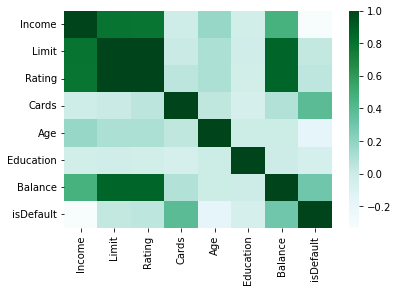

In [16]:
sns.heatmap(data.corr(), cmap='BuGn')

Limit e Rating são fortemente correlacionadas entre si, o que pode influenciar no nosso modelo, logo uma precisa ser eliminada

### Verificar as features numéricas com ANOVA

ANOVA é um método estatístico para verificar se existe diferenças significativas entre as médias de grupos de dados, sendo possível inferir se as variáveis são dependentes uma sobre a outra. Vamos medir o F-Value que é a relação entre a variância entre grupos dividido pela variância dentro dos grupos. Deste modo, fica claro dizer que quanto maior a variância entre os grupos, mais diferentes as duas variáveis serão. Então, quanto maior o valor de F maior é a evidência de que as variáveis são diferentes entre si e que exercem influência uma sobre a outra.

In [17]:
import pingouin as pg
from sklearn.feature_selection import f_classif
from scipy import stats 

In [18]:
dataNonCategorical.loc[0:400,'isDefault'] = dataCategorical["isDefault"]

/opt/anaconda3/envs/clustering/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/opt/anaconda3/envs/clustering/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


A função pg anova só aceita valores numéricos, então é preciso passar os valores binários da coluna isDefault para 0 e 1

In [19]:
le = preprocessing.LabelEncoder()
dataNonCategorical.loc[0:400,'isDefault']  = le.fit_transform(dataNonCategorical['isDefault']) #false = 0

In [20]:
dataNonCategorical

,Income,Limit,Rating,Cards,Age,Education,Balance,isDefault
0,14.891,3606,283,2,34,11,333,1
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0
...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,1
396,13.364,3838,296,5,65,17,480,1
397,57.872,4171,321,5,67,12,138,0
398,37.728,2525,192,1,44,13,0,0


In [21]:
aov = []
for variance in dataNonCategorical.columns[:7]:
    v = pg.anova(data=dataNonCategorical, dv='isDefault', between=variance, detailed=True).round(3)
    aov.append(v)

In [22]:
pd.concat(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,Income,78.798,398,0.198,0.396,0.887,0.994
1,Within,0.500,1,0.500,NaN,NaN,NaN
0,Limit,77.298,386,0.200,1.302,0.306,0.975
1,Within,2.000,13,0.154,NaN,NaN,NaN
0,Rating,56.098,282,0.199,1.003,0.500,0.707
1,Within,23.200,117,0.198,NaN,NaN,NaN
0,Cards,13.675,8,1.709,10.185,0.000,0.172
1,Within,65.622,391,0.168,NaN,NaN,NaN
0,Age,14.765,67,0.220,1.134,0.238,0.186
1,Within,64.532,332,0.194,NaN,NaN,NaN


In [23]:
anova_result = pd.concat(aov)
anova_result = anova_result[anova_result.Source!='Within'][['Source','F']]
anova_result

,Source,F
0,Income,0.396
0,Limit,1.302
0,Rating,1.003
0,Cards,10.185
0,Age,1.134
0,Education,0.674
0,Balance,4.759


/opt/anaconda3/envs/clustering/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


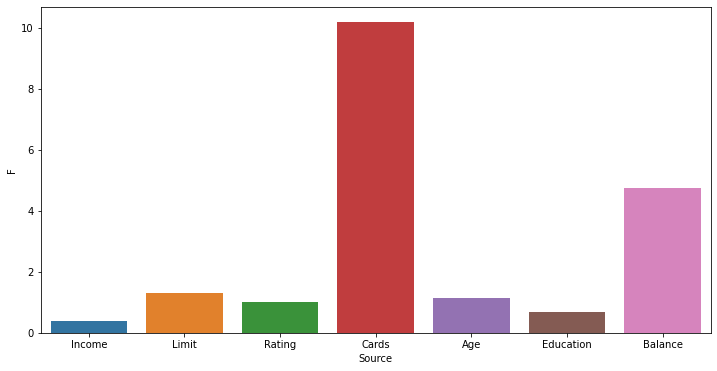

In [24]:
plt.figure(figsize=(12,6))
sns.barplot('Source', 'F', data=anova_result)
plt.show()

Cards e Balance são ótimas escolhas de features.

#### Passando as features categóricas para numéricas com LabelEncoder

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
dataCategorical.loc[0:400,'Gender']  = le.fit_transform(dataCategorical['Gender']) #male = 0
dataCategorical.loc[0:400,'Student']  = le.fit_transform(dataCategorical['Student']) #no = 0
dataCategorical.loc[0:400,'Married']  = le.fit_transform(dataCategorical['Married']) #no = 0
dataCategorical.loc[0:400,'Ethnicity']  = le.fit_transform(dataCategorical['Ethnicity']) #African = 0, Asian =1, Caucasian = 0
dataCategorical.loc[0:400,'isDefault']  = le.fit_transform(dataCategorical['isDefault']) #false = 0

/opt/anaconda3/envs/clustering/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
dataCategorical

,Gender,Student,Married,Ethnicity,isDefault
0,0,0,1,2,1
1,1,1,1,1,0
2,0,0,0,1,0
3,1,0,0,1,0
4,0,0,1,2,0
...,...,...,...,...,...
395,0,0,1,2,1
396,0,0,0,0,1
397,1,0,1,2,0
398,0,0,1,2,0


In [28]:
data[['Gender', 'Student', 'Married', 'Ethnicity', "isDefault"]] = dataCategorical[['Gender', 'Student', 'Married', 'Ethnicity', "isDefault"]]

In [29]:
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,isDefault
0,14.891,3606,283,2,34,11,0,0,1,2,333,1
1,106.025,6645,483,3,82,15,1,1,1,1,903,0
2,104.593,7075,514,4,71,11,0,0,0,1,580,0
3,148.924,9504,681,3,36,11,1,0,0,1,964,0
4,55.882,4897,357,2,68,16,0,0,1,2,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,2,560,1
396,13.364,3838,296,5,65,17,0,0,0,0,480,1
397,57.872,4171,321,5,67,12,1,0,1,2,138,0
398,37.728,2525,192,1,44,13,0,0,1,2,0,0


### Verificar as features categóricas com Chi-Squared 

Chi Quadrado mede a relação de dependência entre duas variáveis categóricas, verificando como os valores esperados desviam dos valores observados. Quando temos um alto valor de Chi-quadrado (nosso p-value será baixo), significa que temos evidência estatística para inferir que os valores observados e esperados não são os mesmos, portanto possuem dependência entre si.
Quanto mais alto o Chi-quadrado, maior a dependência entre as variáveis.

In [30]:
from sklearn.feature_selection import chi2

In [31]:
X = dataCategorical.drop(["isDefault"],axis=1)
y = dataCategorical.isDefault

In [32]:
chi_scores = chi2(X,y)
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [33]:
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
Gender,0.282945,0.594777
Student,3.280053,0.070127
Married,0.001161,0.972815
Ethnicity,0.030896,0.860472


Como resultado, temos que os menores Chi2 scores/ maiores p-Values são os atributos menos dependentes da variável target 

Student é uma feature com forte dependência do nosso target

### Normalizar todas as features

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [35]:
scaler = StandardScaler()
db = preprocessing.StandardScaler().fit(data).transform(data.astype(float))

In [36]:
db = pd.DataFrame(db, columns = ["Income","Limit","Rating","Cards","Age","Education","Gender","Student","Married","Ethnicity","Balance","isDefault"])

In [37]:
db

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,isDefault
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-1.035635,-0.333333,0.795395,0.907841,-0.407277,1.633929
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.965592,3.000000,0.795395,-0.302614,0.834056,-0.612022
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,-1.035635,-0.333333,-1.257237,-0.302614,0.130634,-0.612022
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.965592,-0.333333,-1.257237,-0.302614,0.966900,-0.612022
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-1.035635,-0.333333,0.795395,0.907841,-0.411633,-0.612022
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,-1.035635,-0.333333,0.795395,0.907841,0.087078,1.633929
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,-1.035635,-0.333333,-1.257237,-1.513069,-0.087144,1.633929
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,0.965592,-0.333333,0.795395,0.907841,-0.831944,-0.612022
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,-1.035635,-0.333333,0.795395,0.907841,-1.132477,-0.612022


In [38]:
data_for_model = db.drop(["Income","Limit","Rating","Age","Education","Gender","Married","Ethnicity","isDefault"],axis =1)
data_for_model


,Cards,Student,Balance
0,-0.699130,-0.333333,-0.407277
1,0.031032,3.000000,0.834056
2,0.761194,-0.333333,0.130634
3,0.031032,-0.333333,0.966900
4,-0.699130,-0.333333,-0.411633
...,...,...,...
395,0.031032,-0.333333,0.087078
396,1.491355,-0.333333,-0.087144
397,1.491355,-0.333333,-0.831944
398,-1.429291,-0.333333,-1.132477


### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y = data['isDefault']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_for_model,y, test_size=0.3) # 70% training and 30% test

## Cross-validation

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

### Evaluation

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7833333333333333
Precision: 0.6176470588235294
Recall: 0.6176470588235294


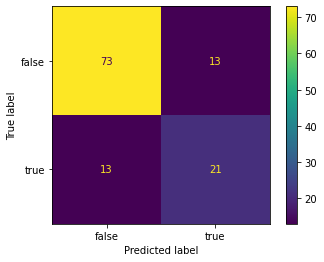

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['false', 'true'])
disp.plot()

## Buscando o melhor k do knn

In [48]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    

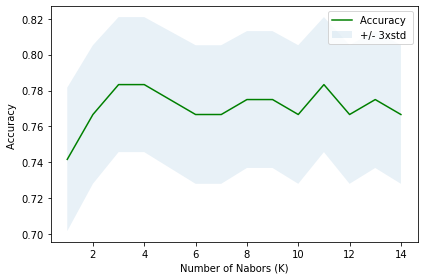

In [49]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7666666666666667
Precision: 0.65
Recall: 0.38235294117647056


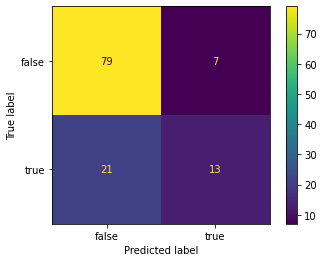

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['false', 'true'])
disp.plot()

### Usando Decision Tree como modelo

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
predTree = dTree.predict(X_test)

In [57]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Precision:",metrics.precision_score(y_test, predTree))
print("Recall:",metrics.recall_score(y_test, predTree))

DecisionTrees's Accuracy:  0.825
Precision: 0.7241379310344828
Recall: 0.6176470588235294


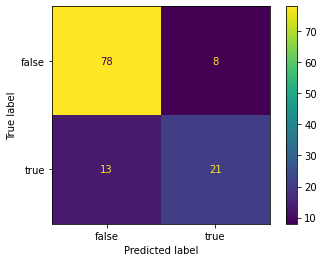

In [58]:
cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, predTree), display_labels=['false', 'true'])
cmd_obj.plot()

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [60]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
yhat_prob = LR.predict_proba(X_test)

In [62]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Precision:",metrics.precision_score(y_test, yhat))
print("Recall:",metrics.recall_score(y_test, yhat))

Logistic Regression Accuracy:  0.7583333333333333
Precision: 0.6666666666666666
Recall: 0.29411764705882354


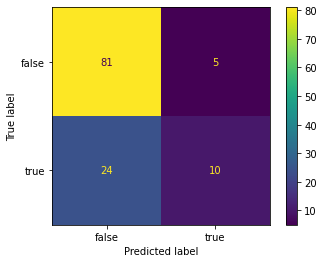

In [63]:
cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test,yhat), display_labels=['false', 'true'])
cmd_obj.plot()

## Usando Cross-validation

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


In [65]:
kfolds = 5
scores = cross_val_score(knn, X_train, y_train, cv = kfolds) 
print("Acurácia nos k-folds", scores)
print("Média", scores.mean())

Acurácia nos k-folds [0.83928571 0.82142857 0.80357143 0.83928571 0.80357143]
Média 0.8214285714285715


## Comparando modelos

In [66]:
knn = KNeighborsClassifier(n_neighbors=9)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LR = LogisticRegression(C=0.01, solver='liblinear')

In [67]:
scoring = ['accuracy','precision','recall','f1']

In [68]:
models = [KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(criterion="entropy", max_depth = 4),
          LogisticRegression(C=0.01, solver='liblinear')]

models_scores = []
for model in models:
    val_scores = cross_val_score(model, X_train, y_train, cv=5)
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo: {} | Média: {:.2} '.format(nome_modelo,
                                    np.mean(val_scores)))

Modelo: KNeighborsClassifier | Média: 0.83 
Modelo: DecisionTreeClassifier | Média: 0.82 
Modelo: LogisticRegression | Média: 0.79 


In [69]:
models = [KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(criterion="entropy", max_depth = 4),
          LogisticRegression(C=0.01, solver='liblinear')]

models_scores = []
for model in models:
    val_scores = cross_validate(model, X_train, y_train, cv=5, scoring= scoring, return_train_score=True)
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo', nome_modelo)
    print('Acurácia:',val_scores['train_accuracy'].mean())
    print('Precisão:',val_scores['train_precision'].mean())
    print('Recall:',val_scores['train_recall'].mean())
    print('F1:',val_scores['train_f1'].mean())
    print("---------")

Modelo KNeighborsClassifier
Acurácia: 0.8482142857142858
Precisão: 0.7761203815443125
Recall: 0.61
F1: 0.6820121542855415
---------
Modelo DecisionTreeClassifier
Acurácia: 0.8473214285714284
Precisão: 0.7912498060945266
Recall: 0.5866666666666667
F1: 0.6728430031684316
---------
Modelo LogisticRegression
Acurácia: 0.7875
Precisão: 0.671134684281236
Recall: 0.4033333333333333
F1: 0.5007864840530128
---------


### Cross-validation apenas com KNN

In [70]:
error_rates = list() # 1-accuracy

for k in range(1,20):
    val_scores = cross_validate(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring= scoring, return_train_score=True)
    error = 1-val_scores['train_accuracy'].mean()
    error_rates.append((k, error))
    nome_modelo = type(model).__name__ #para exibição
    print('Para k =', k )
    print('Acurácia:',val_scores['train_accuracy'].mean())
    print('Precisão:',val_scores['train_precision'].mean())
    print('Recall:',val_scores['train_recall'].mean())
    print('F1:',val_scores['train_f1'].mean())
    print("---------")
    print(error)
    
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate']) 

Para k = 1
Acurácia: 0.9928571428571429
Precisão: 0.9867213114754099
Recall: 0.9866666666666667
F1: 0.9866664351691089
---------
0.0071428571428571175
Para k = 2
Acurácia: 0.8883928571428571
Precisão: 1.0
Recall: 0.5833333333333333
F1: 0.7358785805386594
---------
0.1116071428571429
Para k = 3
Acurácia: 0.8839285714285714
Precisão: 0.8245934658333581
Recall: 0.72
F1: 0.7684030462123117
---------
0.1160714285714286
Para k = 4
Acurácia: 0.8625
Precisão: 0.887949707949708
Recall: 0.5566666666666666
F1: 0.6839781866412361
---------
0.13749999999999996
Para k = 5
Acurácia: 0.8517857142857143
Precisão: 0.7786741438915352
Recall: 0.6266666666666667
F1: 0.693367671719211
---------
0.14821428571428574
Para k = 6
Acurácia: 0.8464285714285715
Precisão: 0.816319290465632
Recall: 0.55
F1: 0.6563562753036437
---------
0.15357142857142847
Para k = 7
Acurácia: 0.8535714285714286
Precisão: 0.7933770703639289
Recall: 0.6133333333333334
F1: 0.691068209072607
---------
0.14642857142857135
Para k = 8
Acurá

<Figure size 1800x1200 with 0 Axes>

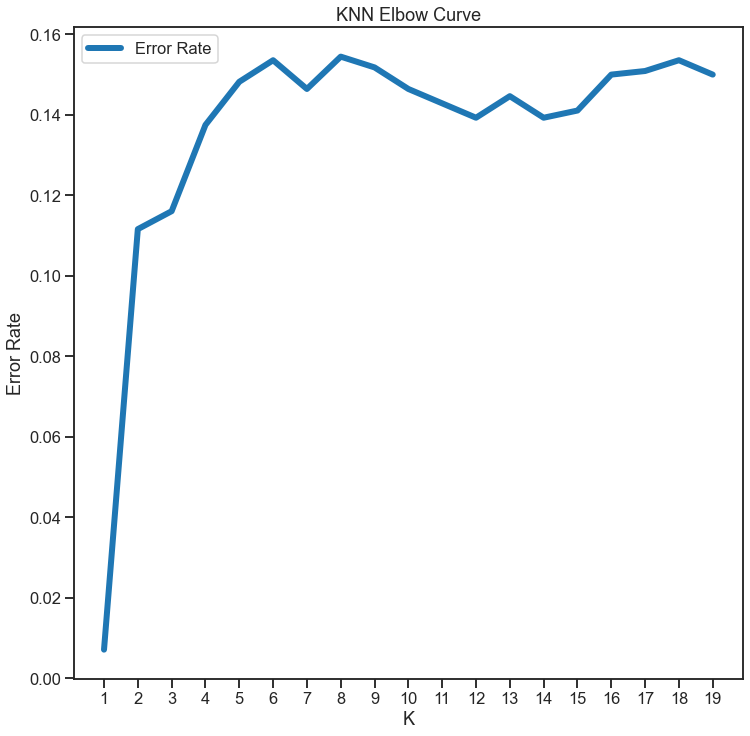

In [71]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, 20))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')